In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_demo.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
m = X.shape[0]

print('X_b', X_b)
print('y', y)
print('m', m)

X_b [[1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  3.  1.1]
 [1.  4.1 1.3]]
y [0. 0. 1. 1.]
m 4


In [2]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def predict(X, theta):    
    h = sigmoid_function(np.dot(X, theta))
    return h.round()


lr = 0.01
num_iter = 1

theta = np.array([0.1, 0.5, -0.1])
#theta = np.array([0.09729751,0.49756867,-0.0998046])

losses = []
accs   = []


for epoch in range(num_iter):    
    print('theta: ', theta)
    

    for i in range(0, 4):
        xi = X_b[i:i+1]
        yi = y[i:i+1]
        print('xi: ', xi)
        print('yi: ', yi)
    
        z = np.dot(xi, theta)
        print('z: ', z)
        y_hat = sigmoid_function(z)
        print('y_hat: ', y_hat)

        loss = loss_function(y_hat, yi)
        print('loss: ', loss)

        # compute mean of gradient
        gradient = np.dot(xi.T, (y_hat - yi)) / yi.size
        print('(y_hat - y): ', (y_hat - yi))
        print('gradient: ', gradient)

        theta -= lr*gradient    
        print('new theta: ', theta)

        if(i % 1 == 0):
            # loss
            #print(f'loss: {loss} \t')
            losses.append(loss)

            # accuracy
            preds = predict(xi, theta)
            acc = (preds == yi).mean()
            #print(f'acc: {acc} \t')
            accs.append(acc)
        break

theta:  [ 0.1  0.5 -0.1]
xi:  [[1.  1.4 0.2]]
yi:  [0.]
z:  [0.78]
y_hat:  [0.68568011]
loss:  1.1573440662232617
(y_hat - y):  [0.68568011]
gradient:  [0.68568011 0.95995216 0.13713602]
new theta:  [ 0.0931432   0.49040048 -0.10137136]


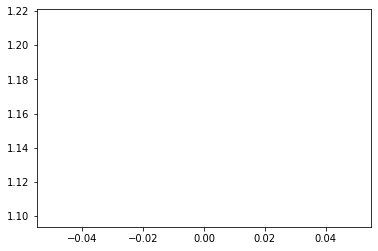

In [3]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

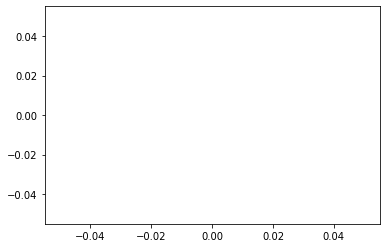

In [4]:
import matplotlib.pyplot as plt

plt.plot(accs)
plt.show()